# 1) Getting to Know a Dataset

## Initial exploration

**Functions for initial exploration**

You are researching unemployment rates worldwide and have been given a new dataset to work with. The data has been saved and loaded for you as a pandas DataFrame called unemployment. You've never seen the data before, so your first task is to use a few pandas functions to learn about this new data.

In [1]:
import pandas as pd

In [2]:
unemployment = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/clean_unemployment.csv")

In [3]:
# Print the first five rows of unemployment
print(unemployment.head())

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  


In [4]:
# Print a summary of non-missing values and data types in the unemployment DataFrame
print(unemployment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB
None


In [5]:
# Print summary statistics for numerical columns in unemployment
print(unemployment.describe())

             2010        2011        2012        2013        2014        2015  \
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000   
mean     8.409286    8.315440    8.317967    8.344780    8.179670    8.058901   
std      6.248887    6.266795    6.367270    6.416041    6.284241    6.161170   
min      0.450000    0.320000    0.480000    0.250000    0.200000    0.170000   
25%      4.015000    3.775000    3.742500    3.692500    3.625000    3.662500   
50%      6.965000    6.805000    6.690000    6.395000    6.450000    6.170000   
75%     10.957500   11.045000   11.285000   11.310000   10.695000   10.215000   
max     32.020000   31.380000   31.020000   29.000000   28.030000   27.690000   

             2016        2017        2018        2019        2020        2021  
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000  
mean     7.925879    7.668626    7.426429    7.243736    8.420934    8.390879  
std      6.045439    5.902152 

**Counting categorical values**

Recall from the previous exercise that the unemployment DataFrame contains 182 rows of country data including country_code, country_name, continent, and unemployment percentages from 2010 through 2021.

You'd now like to explore the categorical data contained in unemployment to understand the data that it contains related to each continent.

In [6]:
# Count the values associated with each continent in unemployment
print(unemployment.value_counts("continent"))

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


**Global unemployment in 2021**

It's time to explore some of the numerical data in unemployment! What was typical unemployment in a given year? What was the minimum and maximum unemployment rate, and what did the distribution of the unemployment rates look like across the world? A histogram is a great way to get a sense of the answers to these questions.

Your task in this exercise is to create a histogram showing the distribution of global unemployment rates in 2021.

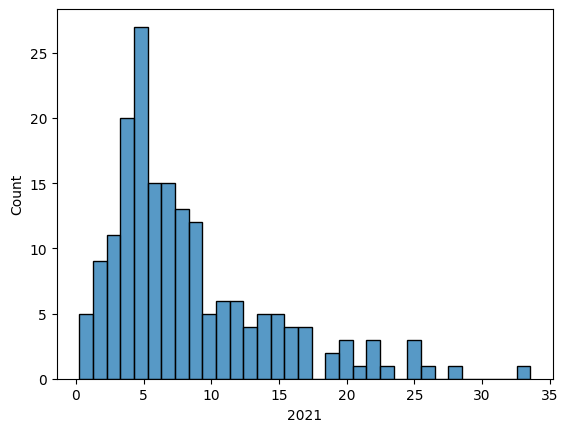

In [11]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(unemployment, x="2021", binwidth=1)
plt.show()

## Data validation

**Detecting data types**

A column has been changed in the unemployment DataFrame and it now has the wrong data type! This data type will stop you from performing effective exploration and analysis, so your task is to identify which column has the wrong data type and then fix it.

In [13]:
# Update the data type of the 2019 column to a float
unemployment["2019"] = unemployment["2019"].astype(str)

In [14]:
unemployment.dtypes

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019             object
2020            float64
2021            float64
dtype: object

In [15]:
# Update the data type of the 2019 column to a float
unemployment["2019"] = unemployment["2019"].astype(float)
# Print the dtypes to check your work
print(unemployment.dtypes)

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


**Validating continents**

Your colleague has informed you that the data on unemployment from countries in Oceania is not reliable, and you'd like to identify and exclude these countries from your unemployment data. The .isin() function can help with that!

Your task is to use .isin() to identify countries that are not in Oceania. These countries should return True while countries in Oceania should return False. This will set you up to use the results of .isin() to quickly filter out Oceania countries using Boolean indexing.

In [16]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

**Validating range**

Now it's time to validate our numerical data. We saw in the previous lesson using .describe() that the largest unemployment rate during 2021 was nearly 34 percent, while the lowest was just above zero.

Your task in this exercise is to get much more detailed information about the range of unemployment data using Seaborn's boxplot, and you'll also visualize the range of unemployment rates in each continent to understand geographical range differences.

In [17]:
# Print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

0.26 33.56


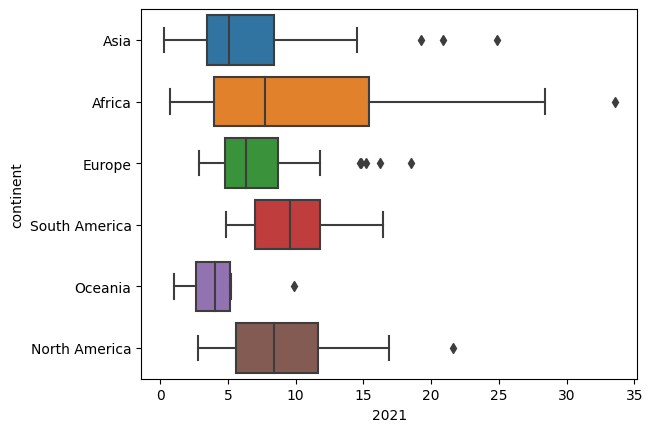

In [11]:
# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x='2021', y='continent')
plt.show()

```
Perhatikan betapa berbedanya rentang pengangguran antabenua. 
Misalnya, persentil ke-50 di Afrika lebih rendah dari pada 
di Amerika Utara, tetapi rentangnya jauh lebih lebar.
```

## Data summarization

**Summaries with .groupby() and .agg()**

In this exercise, you'll explore the means and standard deviations of the yearly unemployment data. First, you'll find means and standard deviations regardless of the continent to observe worldwide unemployment trends. Then, you'll check unemployment trends broken down by continent.

In [1]:
import pandas as pd
import numpy as np

In [2]:
unemployment = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/clean_unemployment.csv")

In [3]:
print(unemployment.dtypes)

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


In [4]:
# Print the mean and standard deviation of rates by year
print(unemployment.agg(['mean', 'std']).round(3))

       2010   2011   2012   2013   2014   2015   2016   2017   2018   2019  \
mean  8.409  8.315  8.318  8.345  8.180  8.059  7.926  7.669  7.426  7.244   
std   6.249  6.267  6.367  6.416  6.284  6.161  6.045  5.902  5.819  5.697   

       2020   2021  
mean  8.421  8.391  
std   6.041  6.067  


In [6]:
# Print yearly mean and standard deviation grouped by continent
print(unemployment.groupby("continent").agg(["mean", "std"]).round(3))

                 2010           2011           2012           2013         \
                 mean    std    mean    std    mean    std    mean    std   
continent                                                                   
Africa          9.344  7.411   9.369  7.402   9.241  7.265   9.132  7.309   
Asia            6.241  5.146   5.942  4.780   5.835  4.757   5.852  4.668   
Europe         11.008  6.392  10.948  6.540  11.326  7.004  11.467  6.969   
North America   8.663  5.116   8.563  5.377   8.449  5.496   8.841  6.082   
Oceania         3.622  2.055   3.648  2.008   4.104  2.723   3.980  2.640   
South America   6.871  2.807   6.518  2.802   6.411  2.937   6.335  2.809   

                 2014         ...   2017          2018          2019         \
                 mean    std  ...   mean    std   mean    std   mean    std   
continent                     ...                                             
Africa          9.121  7.291  ...  9.285  7.408  9.238  7.358  9.264 

**Named aggregations**

You've seen how .groupby() and .agg() can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

Your task is to create a DataFrame called continent_summary which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!

In [7]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021=("2021", "mean"),
    # Create the std_rate_2021 column
    std_rate_2021=("2021", "std")
)


print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


**Visualizing categorical summaries**

As you've learned in this chapter, Seaborn has many great visualizations for exploration, including a bar plot for displaying an aggregated average value by category of data.

In Seaborn, bar plots include a vertical bar indicating the 95% confidence interval for the categorical mean. Since confidence intervals are calculated using both the number of values and the variability of those values, they give a helpful indication of how much data can be relied upon.

Your task is to create a bar plot to visualize the means and confidence intervals of unemployment rates across the different continents.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

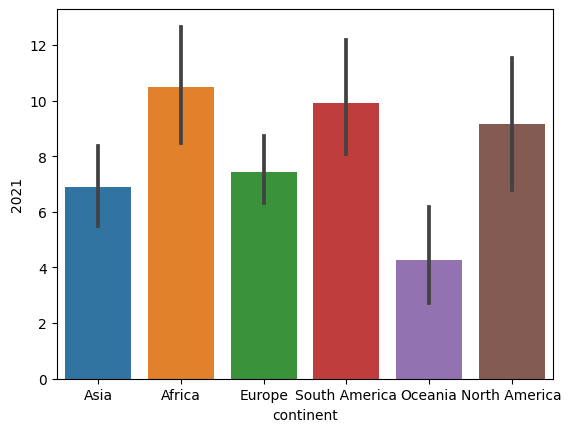

In [10]:
# Create a bar plot of continents and their average unemployment
sns.barplot(x="continent", y="2021", data=unemployment)
plt.show()

```
Walaupun Eropa memiliki rata-rata pengangguran yang lebih tinggi dari pada Asia, 
Eropa juga memiliki interval keyakinan yang lebih kecil untuk rata-rata tersebut, 
sehingga nilai rata-ratanya lebih dapat diandalkan.
```

# 2) Data Cleaning and Imputation

## Addressing missing data

**Dealing with missing data**

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [12]:
import pandas as pd

In [13]:
# Dataset
planes = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/planes.csv")

planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [14]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [15]:
# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


```
By creating a missing values threshold and using it to filter columns, 
you've managed to remove missing values from all columns 
except for "Additional_Info" and "Price".
```

**Strategies for remaining missing data**

The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

The following imports have been made for you:

```
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


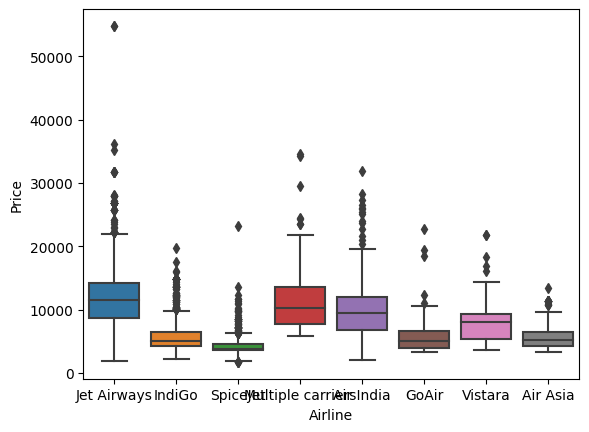

In [18]:
# Create a box plot of Price by Airline
sns.boxplot(data=planes, x="Airline", y="Price")

plt.show()

***Question***

How should you deal with the missing values in "Additional_Info" and "Price"?

***Answer:***

Anda tidak memerlukan kolom "Additional_Info", dan harus memasukkan median "Harga" 

menurut "Maskapai Penerbangan" agar dapat mewakili data secara akurat!

*****

**Imputing missing plane prices**

Now there's just one column with missing values left!

You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "Airline" is a solid approach!

<img src="https://assets.datacamp.com/production/repositories/6180/datasets/c2534724ae536cdb5fa471fd458f7efa7ff655da/Screenshot%202024-08-16%20at%2013.59.57.png" alt="Box plot of plane ticket prices by Airline">

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dataset
planes = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/planes.csv")

planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [3]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [4]:
# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


In [5]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


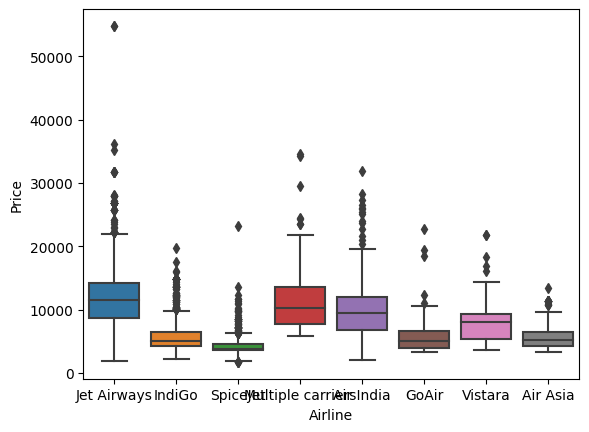

In [6]:
# Create a box plot of Price by Airline
sns.boxplot(data=planes, x="Airline", y="Price")

plt.show()

In [ ]:
""" 
Tidak memerlukan kolom "Additional_Info", dan harus memasukkan median "Harga" 
menurut "Maskapai Penerbangan" agar dapat mewakili data secara akurat!
"""

In [ ]:
# Drop Column Additional_Info
new_planes = planes.drop(columns=["Additional_Info"])

In [10]:
# Calculate median plane ticket prices by Airline
airline_prices = new_planes.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [11]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
new_planes["Price"] = new_planes["Price"].fillna(new_planes["Airline"].map(prices_dict))

print(planes[['Airline', 'Price']].head())

       Airline    Price
0  Jet Airways  13882.0
1       IndiGo   6218.0
2       IndiGo  13302.0
3     SpiceJet   3873.0
4  Jet Airways  11087.0


In [12]:
# Check for missing values
print(new_planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


## Converting and analyzing categorical data

# 3) Relationships in Data

# 4) Turning Exploratory Analysis into Action